In [488]:
"""
SVM, Random Forest, Adaboost and Linear Regression
for Housing Prices prediction
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [489]:
#training data; header not given with the data
X = pd.read_csv('./Data/train_x.csv',header=None)
y = pd.read_csv('./Data/train_y.csv',header=None)
y = y.values.ravel()

In [490]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.000000
mean,7.047500,69.585750,9938.979500,0.995500,0.989500,1.949000,0.048500,6.136000,4.592000,1972.229000,...,0.033000,0.003000,0.002000,0.010500,0.003000,0.003000,0.065000,0.002000,0.0,0.878500
std,3.748102,21.800319,7588.517492,0.066948,0.267255,1.411877,0.237014,1.416865,1.132774,30.203521,...,0.178681,0.054704,0.044688,0.101956,0.054704,0.054704,0.246588,0.044688,0.0,0.326789
min,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,5.000000,60.000000,7439.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1955.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,5.000000,70.000000,9475.000000,1.000000,1.000000,3.000000,0.000000,6.000000,4.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,10.000000,80.000000,11475.750000,1.000000,1.000000,3.000000,0.000000,7.000000,5.000000,2001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,15.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,2.000000,10.000000,8.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [491]:
X.skew(axis = 0,skipna = True)

0       0.140189
1       1.772671
2      15.205306
3     -14.817423
4      -0.432842
         ...    
235    18.188802
236     3.531691
237    22.310278
238     0.000000
239    -2.318797
Length: 240, dtype: float64

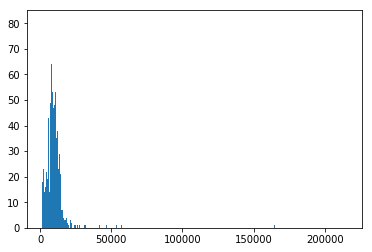

In [492]:
plt.hist(X.loc[:,2],bins=1000)
plt.show()

In [493]:
# transform some skewed features columns 
X.loc[:,1]=np.log(X.loc[:,1])
X.loc[:,2]=np.log(X.loc[:,2])
#X.describe()
print(X.skew(axis = 0,skipna = True))


0       0.140189
1      -1.087721
2      -0.634198
3     -14.817423
4      -0.432842
         ...    
235    18.188802
236     3.531691
237    22.310278
238     0.000000
239    -2.318797
Length: 240, dtype: float64


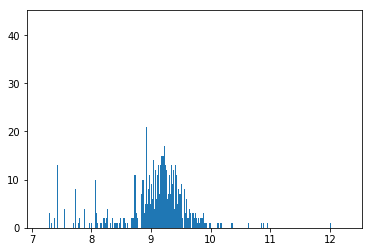

In [494]:
plt.hist(X.loc[:,2],bins=1000)
plt.show()

In [495]:
#Scale training data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

#train test split data (given)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#x_train = pd.DataFrame(data=x_train)
#x_test = pd.DataFrame(data=x_test)

In [496]:
# Grid Search CV on Linear and RBF SVM
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

base_estimator=np.array([10000,2000,100,1])
gamma_range=np.array([0.1])
kernel_range=np.array(['rbf','linear'])
param_grid=dict(gamma=gamma_range,C=base_estimator,kernel=kernel_range)
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=5,scoring='neg_mean_absolute_error')
grid.fit(x_train,y_train)
#print('parameter=',grid.cv_results_['params'])
#print('mean test score=',grid.cv_results_['mean_test_score'])
print('gridSearchCV, best mae =',grid.best_score_)
print('gridSearchCV, best param.=',grid.best_params_)
svm=grid.best_estimator_
y_predict=svm.predict(x_test)
print(mean_absolute_error(y_test, y_predict))
#write_csv(y_predict,'linear_svm.csv')

gridSearchCV, best mae = -16011.071615965
gridSearchCV, best param.= {'gamma': 0.1, 'C': 10000, 'kernel': 'linear'}
19175.924368882796


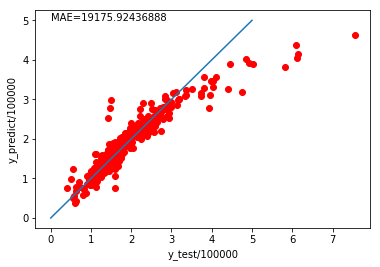

In [497]:
# Predicted vs Actual values
plt.scatter(y_test/100000,y_predict/100000,color='red')
plt.plot([0,5],[0,5])
plt.xlabel("y_test/100000")
plt.ylabel("y_predict/100000")
plt.text(0, 5,'MAE='+np.array2string(mean_absolute_error(y_test, y_predict)))
plt.show()

In [498]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Grid Search CV
n_esti=np.array([100,200,350,400])
maxfeat=np.array([20,30,40,50,60,100])
maxdepth=np.array([25,30,40,60])
minsample_leaf=np.array([1])
bootstrap=[False]

param_grid=dict(n_estimators=n_esti,max_features=maxfeat,max_depth=maxdepth,min_samples_leaf=minsample_leaf,bootstrap=bootstrap)

grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5,scoring='neg_mean_absolute_error')
grid.fit(x_train,y_train)

#print('parameter=',grid.cv_results_['params'])
#print('mean test score=',grid.cv_results_['mean_test_score'])
print('gridSearchCV, best randomforest mae =',grid.best_score_)
print('gridSearchCV, best randomforest param.=',grid.best_params_)

randfor=grid.best_estimator_

y_predict=randfor.predict(x_test)
print(mean_absolute_error(y_test, y_predict))

gridSearchCV, best randomforest mae = -14671.915437499998
gridSearchCV, best randomforest param.= {'max_depth': 40, 'bootstrap': False, 'n_estimators': 400, 'min_samples_leaf': 1, 'max_features': 50}
16894.91689375


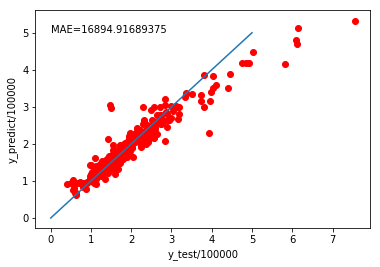

In [499]:
# Predicted vs Actual values
plt.scatter(y_test/100000,y_predict/100000,color='red')
plt.plot([0,5],[0,5])
plt.xlabel("y_test/100000")
plt.ylabel("y_predict/100000")
plt.text(0, 5,'MAE='+np.array2string(mean_absolute_error(y_test, y_predict)))
plt.show()

In [500]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ABR=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=35))

#GridSearch CV
n_esti=np.array([10,25,50,100,150,175])
learn_rate=np.array([0.1,0.5,1,2,5])
loss_fn=np.array(['linear','exponential'])
param_grid=dict(n_estimators=n_esti,learning_rate=learn_rate,loss=loss_fn)

grid = GridSearchCV(ABR, param_grid=param_grid, cv=5,scoring='neg_mean_absolute_error')
grid.fit(x_train,y_train)

#print('parameter=',grid.cv_results_['params'])
#print('mean test score=',grid.cv_results_['mean_test_score'])
print('gridSearchCV, best adaboost mae =',grid.best_score_)
print('gridSearchCV, best adaboost param.=',grid.best_params_)

adb=grid.best_estimator_
y_predict=adb.predict(x_test)
print(mean_absolute_error(y_test, y_predict))

gridSearchCV, best adaboost mae = -15079.81125
gridSearchCV, best adaboost param.= {'learning_rate': 2.0, 'n_estimators': 150, 'loss': 'exponential'}
17371.535


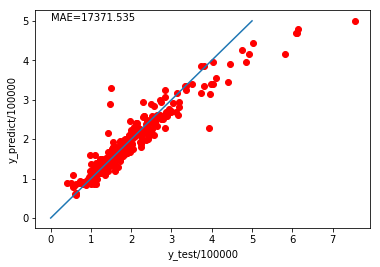

In [501]:
# Predicted vs Actual values
plt.scatter(y_test/100000,y_predict/100000,color='red')
plt.plot([0,5],[0,5])
plt.xlabel("y_test/100000")
plt.ylabel("y_predict/100000")
plt.text(0, 5,'MAE='+np.array2string(mean_absolute_error(y_test, y_predict)))
plt.show()

In [502]:
#Linerar Regression without regularization
from sklearn import linear_model
ols=linear_model.LinearRegression(fit_intercept=True,normalize=False)
    
ols.fit(x_train,y_train)

y_prediction_ols = ols.predict(x_test)

mae_OLS=mean_absolute_error(y_test,y_prediction_ols)

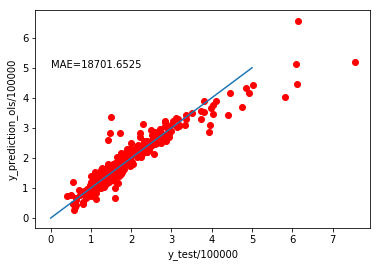

In [503]:
# Predicted vs Actual values
plt.scatter(y_test/100000,y_prediction_ols/100000,color='red')
plt.plot([0,5],[0,5])
plt.xlabel("y_test/100000")
plt.ylabel("y_prediction_ols/100000")
plt.text(0, 5,'MAE='+np.array2string(mean_absolute_error(y_test, y_prediction_ols)))
plt.show()

In [504]:
# Linear regression with Lasso regularization
alphas1=[1,5,10,20,30,40,50,60]
intercept=[True]
param_grid=dict(alpha=alphas1,fit_intercept=intercept)
lasso=linear_model.Lasso(max_iter=5000)

grid = GridSearchCV(lasso, param_grid=param_grid, cv=5,scoring='neg_mean_absolute_error')
grid.fit(x_train,y_train)

print('gridSearchCV, best lasso mae =',grid.best_score_)
print('gridSearchCV, best lasso param.=',grid.best_params_)  

las=grid.best_estimator_
y_predict=las.predict(x_test)
print(mean_absolute_error(y_test, y_predict))

gridSearchCV, best lasso mae = -15744.482886102003
gridSearchCV, best lasso param.= {'alpha': 40, 'fit_intercept': True}
18318.328802273012


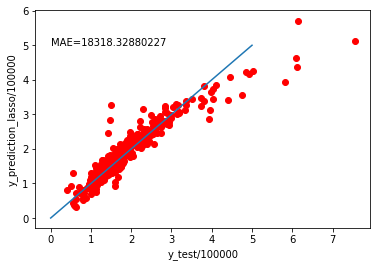

In [505]:
# Predicted vs Actual values
plt.scatter(y_test/100000,y_predict/100000,color='red')
plt.plot([0,5],[0,5])
plt.xlabel("y_test/100000")
plt.ylabel("y_prediction_lasso/100000")
plt.text(0, 5,'MAE='+np.array2string(mean_absolute_error(y_test, y_predict)))
plt.show()

In [506]:
# Linear regression with Ridge regularization
alphas1=[0.1,0.2,0.3,0.5,1,10]
intercept=[True, False]
param_grid=dict(alpha=alphas1,fit_intercept=intercept)
ridge=linear_model.Ridge(max_iter=5000)

grid = GridSearchCV(ridge, param_grid=param_grid, cv=5,scoring='neg_mean_absolute_error')
grid.fit(x_train,y_train)

print('gridSearchCV, best ridge mae =',grid.best_score_)
print('gridSearchCV, best ridge param.=',grid.best_params_)  

ridge=grid.best_estimator_
y_predict=ridge.predict(x_test)
print(mean_absolute_error(y_test, y_predict))

gridSearchCV, best ridge mae = -16499.556120659756
gridSearchCV, best ridge param.= {'alpha': 0.2, 'fit_intercept': False}
18734.4319861107


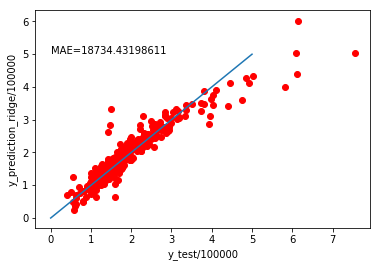

In [507]:
# Predicted vs Actual values
plt.scatter(y_test/100000,y_predict/100000,color='red')
plt.plot([0,5],[0,5])
plt.xlabel("y_test/100000")
plt.ylabel("y_prediction_ridge/100000")
plt.text(0, 5,'MAE='+np.array2string(mean_absolute_error(y_test, y_predict)))
plt.show()